In [1]:
import data
import torch
from torch.utils.data import TensorDataset
import numpy as np
from scipy.stats import entropy, ks_2samp, moment, wasserstein_distance, energy_distance
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import gans.w_gan as wgan
import gans.w_gp_gan as wgpgan
import gans.vae as vae
import gans.ns_gan as nsgan
import gans.mm_gan as mmgan
import gans.ls_gan as lsgan
import gans.dra_gan as dragan
import gans.be_gan as began
from gans.load_data import get_data
from gans.utils import to_var

In [2]:
n=1
size=200
i = 0
j = 0
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
pdfs = ['uniform', 'random']

In [3]:
generator = data.Distribution(distributions[i], size) 
moment(generator.generate_samples(500).T, moment=2)[0:5]

array([1.36770128, 0.7067766 , 0.92086762, 0.73875196, 3.86749438])

In [4]:
def get_pdf(data):
    x = []
    for i in range(data.shape[0]):
        x.append(list(np.histogram(data[i], bins=100, density=True)[0]))
    df = pd.DataFrame(x)
    pdf = list(df.mean(axis=0))
    return pdf


def preprocess(generator, samples, BATCH_SIZE = 100):
    data_train = torch.from_numpy(generator.generate_samples(samples)).float()
    data_val = torch.from_numpy(generator.generate_samples(samples)).float()
    data_test = torch.from_numpy(generator.generate_samples(samples)).float()
    labels_train = torch.from_numpy(np.zeros((samples,1)))
    train = TensorDataset(data_train, labels_train)
    val =TensorDataset(data_val, labels_train)
    test = TensorDataset(data_test, labels_train)
    train_iter = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
    val_iter = torch.utils.data.DataLoader(val, batch_size=BATCH_SIZE, shuffle=True)
    test_iter = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
    return train_iter, val_iter, test_iter

# Multivariate Distributions Example

In [5]:
# generator = data.Distribution(distributions[i], 200)
# generator.save_dist('output_file.pickle')  # Saving the generator

# Mixture Models Example

In [6]:
# generator = data.MixtureDistribution(distributions[i], distributions[j], n_mixtures=15, dim=200)
# generator.get_log_likelihood(data_train)
# generator.save_dist()

# Circles Example

In [7]:
# generator = data.CirclesDatasetGenerator(size=256, n_circles=4, random_colors=True, random_sizes=True, modes=20)
# x = generator.generate_samples(10000)
# print(len(x))
# print(x[0].shape)
# generator.generate_samples_to_directory(5000, './dataset_1')
# generator.save_generator('./generator1.pickle')

# MNIST Data

In [8]:
# train_iter, val_iter, test_iter = get_data()

In [9]:
# train_iter.dataset.data_tensor.shape

# Preprocessing Synthetic Data

In [10]:
i=0
# gen = data.Distribution(distributions[i], size) 

In [11]:
# train_iter, val_iter, test_iter = preprocess(generator, 10000)

In [12]:
# train_iter.dataset.data_tensor.shape

# Controlled Experiments on GANs

## 1. Divergence Measures between Distributions

#### Measuring divergence between Synthetic Data and GAN Data with the following metrics: KL Divergences, Jensen-Shannon Divergence, Optimal Tranport Distance, Wasserstein Distance, Energy Distance, Total Variation Distance


# KS Stat, KL Divergence, JS Divergence

In [31]:
# Example with WGAN
res = {}
# Also loop over mixture models and circles
# Also loop over GANs
for dist in distributions[0:5]:
    res[dist]={}
    gen = data.Distribution(dist,size)
    train_iter, val_iter, test_iter = preprocess(gen, 10000)
    epochs = 50
    model = wgan.GAN(image_size = size, hidden_dim = 256, z_dim = int(round(size/4,0)))
    if torch.cuda.is_available():
        model = model.cuda()
    trainer = wgan.Trainer(train_iter, val_iter, test_iter)
    model, kl, ks, js, wd, ed = trainer.train(model = model, num_epochs = epochs, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)
    res[dist]["KL-Divergence"] = kl
    res[dist]["KS-Stat"] = ks
    res[dist]["Jensen-Shannon"] = js
    res[dist]["Wasserstein-Distance"] = wd
    res[dist]["Energy-Distance"] = ed

A Jupyter Widget

Epoch[1/50], G Loss: -0.0027, D Loss: -0.2934
Epoch[2/50], G Loss: -0.0048, D Loss: -0.5790
Epoch[3/50], G Loss: -0.0088, D Loss: -0.7726

Epoch[4/50], G Loss: -0.0121, D Loss: -0.8529
Epoch[5/50], G Loss: -0.0156, D Loss: -0.8693
Epoch[6/50], G Loss: -0.0174, D Loss: -0.8671
Epoch[7/50], G Loss: -0.0178, D Loss: -0.8537
Epoch[8/50], G Loss: -0.0189, D Loss: -0.8578
Epoch[9/50], G Loss: -0.0193, D Loss: -0.8474
Epoch[10/50], G Loss: -0.0189, D Loss: -0.8343
Epoch[11/50], G Loss: -0.0194, D Loss: -0.8259
Epoch[12/50], G Loss: -0.0218, D Loss: -0.8288
Epoch[13/50], G Loss: -0.0211, D Loss: -0.8150
Epoch[14/50], G Loss: -0.0226, D Loss: -0.8130
Epoch[15/50], G Loss: -0.0216, D Loss: -0.8077
Epoch[16/50], G Loss: -0.0222, D Loss: -0.7988
Epoch[17/50], G Loss: -0.0217, D Loss: -0.7977
Epoch[18/50], G Loss: -0.0194, D Loss: -0.8035
Epoch[19/50], G Loss: -0.0185, D Loss: -0.8003
Epoch[20/50], G Loss: -0.0211, D Loss: -0.8066
Epoch[21/50], G Loss: -0.0246, D Loss: -0.8028
Epoch[22/50], G Loss:

A Jupyter Widget

Epoch[1/50], G Loss: -0.0208, D Loss: -0.1629
Epoch[2/50], G Loss: -0.1068, D Loss: -0.2731
Epoch[3/50], G Loss: -0.2197, D Loss: -0.3015
Epoch[4/50], G Loss: -0.3251, D Loss: -0.2891
Epoch[5/50], G Loss: -0.4018, D Loss: -0.2513
Epoch[6/50], G Loss: -0.4294, D Loss: -0.2164
Epoch[7/50], G Loss: -0.4218, D Loss: -0.1858
Epoch[8/50], G Loss: -0.3951, D Loss: -0.1640
Epoch[9/50], G Loss: -0.3757, D Loss: -0.1478
Epoch[10/50], G Loss: -0.3528, D Loss: -0.1325
Epoch[11/50], G Loss: -0.3377, D Loss: -0.1169
Epoch[12/50], G Loss: -0.3317, D Loss: -0.1023
Epoch[13/50], G Loss: -0.3372, D Loss: -0.0868
Epoch[14/50], G Loss: -0.3756, D Loss: -0.0762
Epoch[15/50], G Loss: -0.4116, D Loss: -0.0662
Epoch[16/50], G Loss: -0.3792, D Loss: -0.0586
Epoch[17/50], G Loss: -0.3116, D Loss: -0.0529
Epoch[18/50], G Loss: -0.2530, D Loss: -0.0483
Epoch[19/50], G Loss: -0.1790, D Loss: -0.0431
Epoch[20/50], G Loss: -0.1118, D Loss: -0.0374
Epoch[21/50], G Loss: -0.0890, D Loss: -0.0347
Epoch[22/50], G Loss: 

A Jupyter Widget

Epoch[1/50], G Loss: -0.0165, D Loss: -0.1930
Epoch[2/50], G Loss: -0.0980, D Loss: -0.3327
Epoch[3/50], G Loss: -0.2183, D Loss: -0.3764
Epoch[4/50], G Loss: -0.3278, D Loss: -0.3668
Epoch[5/50], G Loss: -0.4055, D Loss: -0.3241
Epoch[6/50], G Loss: -0.4695, D Loss: -0.2832
Epoch[7/50], G Loss: -0.5285, D Loss: -0.2509
Epoch[8/50], G Loss: -0.5689, D Loss: -0.2248
Epoch[9/50], G Loss: -0.5898, D Loss: -0.1992
Epoch[10/50], G Loss: -0.5943, D Loss: -0.1774
Epoch[11/50], G Loss: -0.5872, D Loss: -0.1587
Epoch[12/50], G Loss: -0.5779, D Loss: -0.1393
Epoch[13/50], G Loss: -0.5652, D Loss: -0.1257
Epoch[14/50], G Loss: -0.5664, D Loss: -0.1114
Epoch[15/50], G Loss: -0.5622, D Loss: -0.0979
Epoch[16/50], G Loss: -0.5512, D Loss: -0.0848
Epoch[17/50], G Loss: -0.5400, D Loss: -0.0744
Epoch[18/50], G Loss: -0.5204, D Loss: -0.0677
Epoch[19/50], G Loss: -0.4888, D Loss: -0.0600
Epoch[20/50], G Loss: -0.4554, D Loss: -0.0551
Epoch[21/50], G Loss: -0.4087, D Loss: -0.0496
Epoch[22/50], G Loss: 

A Jupyter Widget

Epoch[1/50], G Loss: -0.2218, D Loss: -116.8661
Epoch[2/50], G Loss: -0.4711, D Loss: -231.3699
Epoch[3/50], G Loss: -0.6735, D Loss: -312.3275
Epoch[4/50], G Loss: -0.7917, D Loss: -356.3211
Epoch[5/50], G Loss: -0.8026, D Loss: -359.3285
Epoch[6/50], G Loss: -0.8008, D Loss: -359.3259
Epoch[7/50], G Loss: -0.7952, D Loss: -359.3257
Epoch[8/50], G Loss: -0.7900, D Loss: -359.3568
Epoch[9/50], G Loss: -0.7878, D Loss: -359.3399
Epoch[10/50], G Loss: -0.7844, D Loss: -359.3494
Epoch[11/50], G Loss: -0.7841, D Loss: -359.3337
Epoch[12/50], G Loss: -0.7851, D Loss: -359.3286
Epoch[13/50], G Loss: -0.7864, D Loss: -359.3443
Epoch[14/50], G Loss: -0.7891, D Loss: -359.3364
Epoch[15/50], G Loss: -0.7922, D Loss: -359.3410
Epoch[16/50], G Loss: -0.7954, D Loss: -359.3237
Epoch[17/50], G Loss: -0.7987, D Loss: -359.3278
Epoch[18/50], G Loss: -0.8025, D Loss: -359.3102
Epoch[19/50], G Loss: -0.8059, D Loss: -359.3053
Epoch[20/50], G Loss: -0.8104, D Loss: -359.3224
Epoch[21/50], G Loss: -0.8140

A Jupyter Widget

Epoch[1/50], G Loss: -0.2739, D Loss: -0.2945
Epoch[2/50], G Loss: -0.6232, D Loss: -0.5295
Epoch[3/50], G Loss: -0.8829, D Loss: -0.6295
Epoch[4/50], G Loss: -1.0136, D Loss: -0.6260
Epoch[5/50], G Loss: -1.0529, D Loss: -0.5831
Epoch[6/50], G Loss: -1.0638, D Loss: -0.5513
Epoch[7/50], G Loss: -1.0579, D Loss: -0.5219
Epoch[8/50], G Loss: -1.0512, D Loss: -0.4974
Epoch[9/50], G Loss: -1.0597, D Loss: -0.4756
Epoch[10/50], G Loss: -1.0645, D Loss: -0.4531
Epoch[11/50], G Loss: -1.0782, D Loss: -0.4348
Epoch[12/50], G Loss: -1.0859, D Loss: -0.4141
Epoch[13/50], G Loss: -1.0767, D Loss: -0.3988
Epoch[14/50], G Loss: -1.0670, D Loss: -0.3809
Epoch[15/50], G Loss: -1.0695, D Loss: -0.3661
Epoch[16/50], G Loss: -1.0663, D Loss: -0.3523
Epoch[17/50], G Loss: -1.0549, D Loss: -0.3404
Epoch[18/50], G Loss: -1.0491, D Loss: -0.3286
Epoch[19/50], G Loss: -1.0583, D Loss: -0.3168
Epoch[20/50], G Loss: -1.0678, D Loss: -0.3047
Epoch[21/50], G Loss: -1.0874, D Loss: -0.2956
Epoch[22/50], G Loss: 

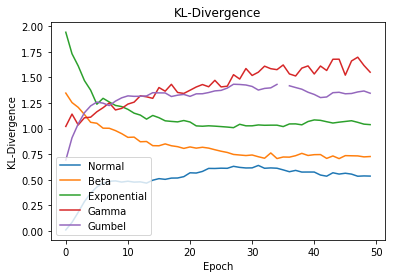

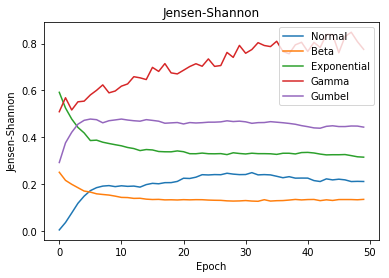

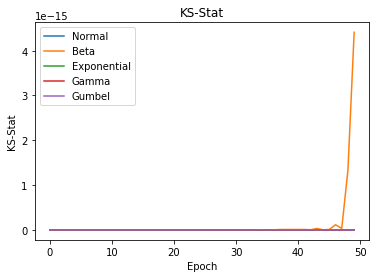

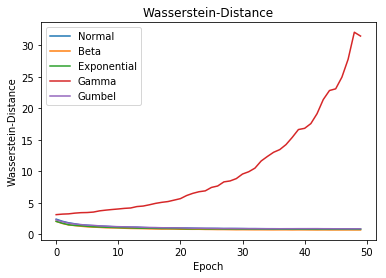

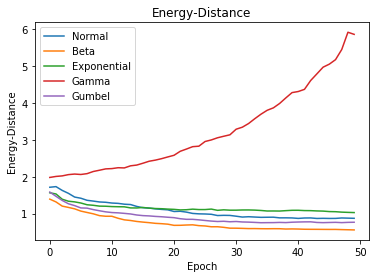

In [32]:
normal = pd.DataFrame(res['normal'])
beta = pd.DataFrame(res['beta'])
exponential = pd.DataFrame(res['exponential'])
gamma = pd.DataFrame(res['gamma'])
gumbel = pd.DataFrame(res['gumbel'])

distance_metrics = ["KL-Divergence","Jensen-Shannon","KS-Stat","Wasserstein-Distance","Energy-Distance"]
for dist in distance_metrics:
    plt.plot(range(epochs),normal[dist], label="Normal")
    plt.plot(range(epochs),beta[dist], label="Beta")
    plt.plot(range(epochs),exponential[dist], label="Exponential")
    plt.plot(range(epochs),gamma[dist], label="Gamma")
    plt.plot(range(epochs),gumbel[dist], label="Gumbel")
    plt.xlabel("Epoch")
    plt.ylabel(dist)
    plt.title(dist)
    plt.legend()
    plt.show()


## 2. Empirical Analysis of Mode Collapse

#### Three methods to measure mode collapse Inception Score, MODE Score, Frechet Inception Distance

In [ ]:
# Here's where I'm not yet sure how to approach the problem. 

## 3. Empirical Evaluation of Performance with varying Information Geometry

In [ ]:
# Here we look over different degrees of complexity which we can define before. 

## 4. Evaluation of Empirical Sample Complexity

In [ ]:
# Here we're looking at number of samples. So, we just loop through samples!

## Here's all the GANs by themselves

# WGAN

In [ ]:
model = wgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)

# WGAN GP

In [ ]:
model = wgpgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128) 
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgpgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 5)

# VAE

In [ ]:
model = vae.VAE(image_size = size, hidden_dim = 400, z_dim = 20)
if torch.cuda.is_available():
    model.cuda()
trainer = vae.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model, num_epochs = n)

# # Explore latent space
# viz = vae.Viz(train_iter, val_iter, test_iter, model)
# viz.make_all()

# NS GAN

In [ ]:
model = nsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = nsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, D_steps = 1)

# MM GAN

In [ ]:
model = mmgan.GAN(image_size = size, hidden_dim = 400, z_dim = 100)
if torch.cuda.is_available():
    model = model.cuda()
trainer = mmgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, G_init = 5, D_steps = 1)

# LS GAN

In [ ]:
model = lsgan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = lsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# DRA GAN

In [ ]:
model = dragan.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = dragan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# BE GAN

In [ ]:
model = began.GAN(image_size = size, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = began.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)